# KNN Classification on the Iris Dataset with scikit-learn

## By Christopher Hauman
<br>

### This will quickly run through using scikit-learn to perform knn classification on the [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset. This is one of the best places to start learning about [supervised machine learning](https://towardsdatascience.com/supervised-machine-learning-classification-5e685fe18a6d). If you're not familiar with knn, you should start [here](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/).
<br>

### Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://github.com/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb).
<br>

In [276]:
# import packages

# datasets has the Iris dataset
from sklearn import datasets

# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

First, we'll load iris dataset. Note that this is in the form of a numPy array.

In [277]:
# load dataset
iris = datasets.load_iris()
iris.data.shape

(150, 4)

We can see the iris data has 150 observations (rows) and 4 variables (columns).
<br>

Before we move forward, we'll cover some common language for machine learning. When performing knn classification, we're trying to accurately classify something based on certain data we're given. i.e., we're using **predictor variables/features** to predict the value of a **target variable**. Let's look at the **feature names** and **target names** for the iris data:

In [280]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [281]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

To put it into context, we're going to try and use the sepal length, sepal width, petal length, and petal width values of each observation to **categorize** that observation as a setosa iris, versicolor iris, or virginica iris. We have the correct target values to help us build the model and test its accuracy.

In [260]:
# load the data and target variables
x, y = iris.data, iris.target

In [282]:
# create DataFrame with iris data
df = pd.DataFrame(x, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Note this DataFrame doesn't have the target values. We have no idea what type of iris they are.
<br>

If we want, we can add the target values to a copy of the DataFrame if you'd to have them together.

In [284]:
# copy df
df_labeled = df.copy()
# add species to df_labeled
df_labeled["species"] = y

df_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can also add the actual names of the species to the data by adding the iris name to the DataFrame based on their corresponding target value. This can be used for plotting or other analysis.

In [285]:
df_labeled2 = df.copy()

# for loop to name species based on target variable (0='setosa', 1='versicolor', 2='virginica')
names = []
for i in y:
    if i == 0:
        names.append("setosa")
    elif i == 1:
        names.append("versicolor")
    else:
        names.append("virginica")
        
# add names to df_labeled2
df_labeled2["species"] = names

df_labeled2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now that we've imported the data, let's take a look at the sepals and petals of the iris data:

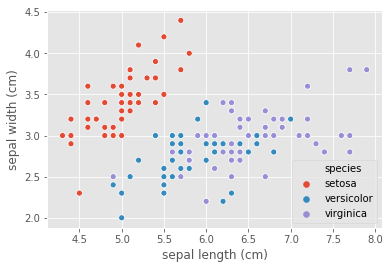

In [287]:
plt.figure()
sns.scatterplot(x='sepal length (cm)', y="sepal width (cm)", hue='species', data=df_labeled2)
plt.show()

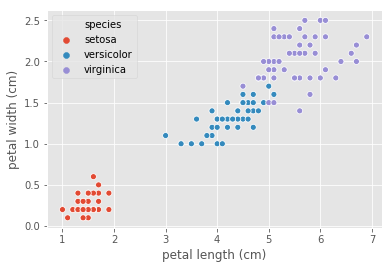

In [288]:
plt.figure()
sns.scatterplot(x='petal length (cm)', y="petal width (cm)", hue='species', data=df_labeled2)
plt.show()

Upon seeing the second plot, it's clear that there's a very strong correlation between petal length and width, much stronger than for the sepal data. Additionally, we should note that the species of iris are grouped much more clearly by the petals (though setosas do appear to have some distinct values for sepal width and length).

Now it's time to perform the knn classification on the data. In this case, we're not separating the data into training and test sets, though we'd need to do this for very large datasets. In this case, we'll train the model using the entire dataset with the target values, and then see how accurately the model would predict the missing values *without* the target values.

In [267]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [289]:
# use k=11 to create the classifier
knn = KNeighborsClassifier(n_neighbors=11)

Note that we chose an odd value for k. We should always use an odd value for k, as it will ensure the algorithm doesn't encounter a tie between two categories.
<br>

It's time to fit the model. We pass the iris data and target values to the knn.fit function, which creates a model based on the classifier we created:

In [291]:
# Train the model on the Iris dataset with the target values
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

<br>
We have our first model! Let's see how the model will classify the iris data without having access to the target values. We'll predict the values and then compare it to the target values:

In [293]:
# perform the knn prediction wihtout the target values. Note that df essentially the same as iris['data'].
prediction1 = knn.predict(df)

# compare the prediction to the target values
prediction1 == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We see the prediction was very close! It only got a few values incorrect. We can use the following method to calculate the accuracy as a decimal value:

In [294]:
print(metrics.accuracy_score(prediction1, y))

0.9733333333333334


We see our current fit is 97.3% accurate. Let's see if we can increase the accuracy by looping through a few more k values to see what yields the highest accuracy model:

In [296]:
tries = range(3, 27, 2)
for i in tries:
    #set k and use it to perform the knn classification
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(iris['data'], iris['target'])
    prediction = knn.predict(df)
    
    print("For k = " + str(i) + ", The model accuracy is " + str(metrics.accuracy_score(prediction, y)) + "\n\n")

For k = 3, The model accuracy is 0.96


For k = 5, The model accuracy is 0.9666666666666667


For k = 7, The model accuracy is 0.9733333333333334


For k = 9, The model accuracy is 0.98


For k = 11, The model accuracy is 0.9733333333333334


For k = 13, The model accuracy is 0.98


For k = 15, The model accuracy is 0.9866666666666667


For k = 17, The model accuracy is 0.98


For k = 19, The model accuracy is 0.98


For k = 21, The model accuracy is 0.98


For k = 23, The model accuracy is 0.98


For k = 25, The model accuracy is 0.98




We see the most accurate fit is when k = 15, but there was very little variation between the fits. Keep in mind this form of testing for the maximum accuracy would be very computationally intensive for a large dataset. Choosing an optimal k can be very difficult, but a simple approach is to simply take k = sqrt(n), where n is the number of observations you have. You can read much more about choosing a k-value [here](https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606).

<br>
It's that simple! You've now performed your first machine learning model! There are countless applications for knn classification, and many other incredibly machine learning algorithms you can learn about.
<br>
Please feel free to email me at christopherhauman@gmail.com if you have any questions.